In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
A = pd.read_csv('..\IR - 7.csv')

In [3]:
#Dataset
A

,BA,DE,FE
0,0.048808,-0.093238,-0.029175
1,0.052912,0.187288,-0.186347
2,-0.056815,0.217663,-0.341260
3,-0.108520,0.070172,-0.160871
4,-0.018228,0.100385,0.179978
...,...,...,...
122131,0.062609,-0.162273,0.093482
122132,0.139221,0.134171,-0.152858
122133,0.078704,0.065624,0.084853
122134,-0.010019,-0.184039,0.067184


In [4]:
A.iloc[:, 1:2].values

array([[-0.09323776],
       [ 0.1872877 ],
       [ 0.21766307],
       ...,
       [ 0.06562379],
       [-0.184039  ],
       [-0.04044635]])

In [5]:
X=A.iloc[:, 1:2].values
y=A.iloc[:, 2:3].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [8]:
from sklearn import metrics

M1 = metrics.mean_absolute_error(y_test, y_pred);
M2 = metrics.mean_squared_error(y_test, y_pred);
M3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred));

print('Mean Absolute Error:', M1)
print('Mean Squared Error:', M2)
print('Root Mean Squared Error:', M3)

Mean Absolute Error: 0.19200056030966206
Mean Squared Error: 0.059221542253597395
Root Mean Squared Error: 0.24335476624384697


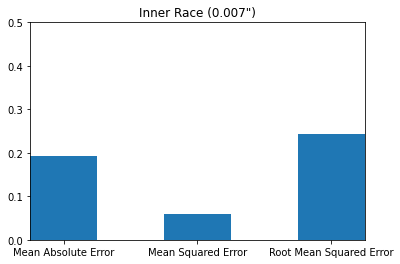

In [9]:
from matplotlib import pyplot as plt

metrics = ('Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error')
values = (M1, M2, M3)

plt.title('Inner Race (0.007")')
plt.axis([0, 2, 0, 0.5])
plt.bar(metrics, values, align='center', width=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

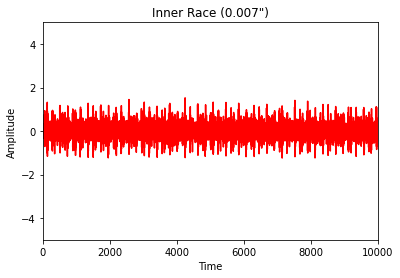

In [10]:
from matplotlib import pyplot as plt
from matplotlib import style
from numpy import genfromtxt

plt.title('Inner Race (0.007")')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axis([0, 10000, -5, 5])
plt.plot(A, 'red')
plt.show()

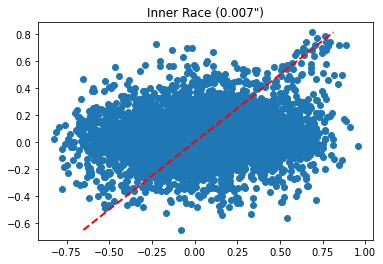

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Inner Race (0.007")')
plt.scatter(y_test,y_pred)
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()],"k--",lw=2,color="red")
plt.show()

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

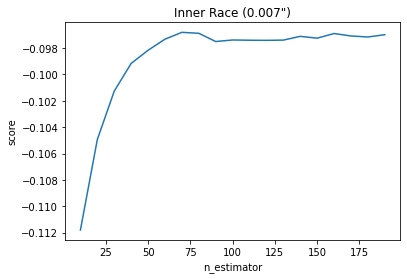

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title('Inner Race (0.007")')
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

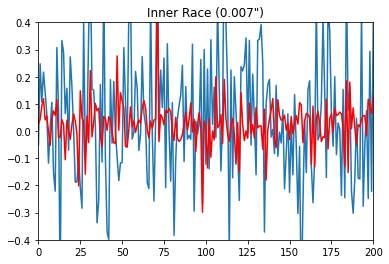

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Inner Race (0.007")')
plt.axis((0,200,-0.4,0.4))
plt.plot(y_test)
plt.plot(y_pred, 'red')
